In [1]:
%load_ext PWE_NB_Extension

In [2]:
from PW_explorer.run_clingo import run_clingo
from PW_explorer.load_worlds import load_worlds
from PW_explorer.visualize import PWEVisualization
from PW_explorer.helper import pw_slicer
from nxpd import draw
from nxpd import nxpdParams
nxpdParams['show'] = 'ipynb'
import networkx as nx

In [3]:
%%clingo --donot-display_input -lci automorphism_enc --donot-run

% e(X,Y) :- e(Y,X). --> only if undirected
gnode(X) :- e(X,_).
gnode(X) :- e(_,X).

vmap(X,Y) ; vout(X,Y) :- gnode(X), gnode(Y).
:- vmap(X1,Y1), vmap(X2,Y2), e(X1,X2), not e(Y1,Y2).
:- vmap(X1,Y1), vmap(X2,Y2), not e(X1,X2), e(Y1,Y2).

% used1(X) :- vmap(X,_).
% :- gnode(X), not used1(X).
% :- vmap(X,Y),vmap(X,Z),Y!=Z.
% :- vmap(Y,X),vmap(Z,X),Y!=Z.

:- gnode(X), #count {Y: vmap(X,Y)} != 1.
:- gnode(X), #count {Y: vmap(Y,X)} != 1.

#show vmap/2.

In [4]:
%%clingo -l "property-ID-P-V/ex1.lp4" automorphism_enc --donot-display_input

e(X,Y) :- prop(X,_,Y).

p2(X,Y,ID,VALUE) :- e(X,Y), vmap(X,ID), vmap(Y,VALUE).

#show p2/4.

Output:


'Answer: 1\nvmap(o1,o1) vmap(o2,o2) vmap(o3,o3) vmap(o4,o4) vmap(red,red) vmap(box,box) vmap(large,large) vmap(green,green) p2(o1,red,o1,red) p2(o1,box,o1,box) p2(o1,large,o1,large) p2(o2,green,o2,green) p2(o2,box,o2,box) p2(o2,large,o2,large) p2(o3,red,o3,red) p2(o3,box,o3,box) p2(o3,large,o3,large) p2(o4,red,o4,red) p2(o4,box,o4,box) p2(o4,large,o4,large)\nAnswer: 2\nvmap(o1,o1) vmap(o2,o2) vmap(o4,o3) vmap(o3,o4) vmap(red,red) vmap(box,box) vmap(large,large) vmap(green,green) p2(o1,red,o1,red) p2(o1,box,o1,box) p2(o1,large,o1,large) p2(o2,green,o2,green) p2(o2,box,o2,box) p2(o2,large,o2,large) p2(o3,red,o4,red) p2(o3,box,o4,box) p2(o3,large,o4,large) p2(o4,red,o3,red) p2(o4,box,o3,box) p2(o4,large,o3,large)\nAnswer: 3\nvmap(o1,o1) vmap(o2,o2) vmap(o4,o3) vmap(o3,o4) vmap(red,red) vmap(large,box) vmap(box,large) vmap(green,green) p2(o1,red,o1,red) p2(o1,box,o1,large) p2(o1,large,o1,box) p2(o2,green,o2,green) p2(o2,box,o2,large) p2(o2,large,o2,box) p2(o3,red,o4,red) p2(o3,box,o4,large) p2(o3,large,o4,box) p2(o4,red,o3,red) p2(o4,box,o3,large) p2(o4,large,o3,box)\nAnswer: 4\nvmap(o1,o1) vmap(o2,o2) vmap(o3,o3) vmap(o4,o4) vmap(red,red) vmap(large,box) vmap(box,large) vmap(green,green) p2(o1,red,o1,red) p2(o1,box,o1,large) p2(o1,large,o1,box) p2(o2,green,o2,green) p2(o2,box,o2,large) p2(o2,large,o2,box) p2(o3,red,o3,red) p2(o3,box,o3,large) p2(o3,large,o3,box) p2(o4,red,o4,red) p2(o4,box,o4,large) p2(o4,large,o4,box)\nAnswer: 5\nvmap(o3,o1) vmap(o2,o2) vmap(o1,o3) vmap(o4,o4) vmap(red,red) vmap(box,box) vmap(large,large) vmap(green,green) p2(o1,red,o3,red) p2(o1,box,o3,box) p2(o1,large,o3,large) p2(o2,green,o2,green) p2(o2,box,o2,box) p2(o2,large,o2,large) p2(o3,red,o1,red) p2(o3,box,o1,box) p2(o3,large,o1,large) p2(o4,red,o4,red) p2(o4,box,o4,box) p2(o4,large,o4,large)\nAnswer: 6\nvmap(o4,o1) vmap(o2,o2) vmap(o1,o3) vmap(o3,o4) vmap(red,red) vmap(box,box) vmap(large,large) vmap(green,green) p2(o1,red,o3,red) p2(o1,box,o3,box) p2(o1,large,o3,large) p2(o2,green,o2,green) p2(o2,box,o2,box) p2(o2,large,o2,large) p2(o3,red,o4,red) p2(o3,box,o4,box) p2(o3,large,o4,large) p2(o4,red,o1,red) p2(o4,box,o1,box) p2(o4,large,o1,large)\nAnswer: 7\nvmap(o3,o1) vmap(o2,o2) vmap(o1,o3) vmap(o4,o4) vmap(red,red) vmap(large,box) vmap(box,large) vmap(green,green) p2(o1,red,o3,red) p2(o1,box,o3,large) p2(o1,large,o3,box) p2(o2,green,o2,green) p2(o2,box,o2,large) p2(o2,large,o2,box) p2(o3,red,o1,red) p2(o3,box,o1,large) p2(o3,large,o1,box) p2(o4,red,o4,red) p2(o4,box,o4,large) p2(o4,large,o4,box)\nAnswer: 8\nvmap(o4,o1) vmap(o2,o2) vmap(o1,o3) vmap(o3,o4) vmap(red,red) vmap(large,box) vmap(box,large) vmap(green,green) p2(o1,red,o3,red) p2(o1,box,o3,large) p2(o1,large,o3,box) p2(o2,green,o2,green) p2(o2,box,o2,large) p2(o2,large,o2,box) p2(o3,red,o4,red) p2(o3,box,o4,large) p2(o3,large,o4,box) p2(o4,red,o1,red) p2(o4,box,o1,large) p2(o4,large,o1,box)\nAnswer: 9\nvmap(o4,o1) vmap(o2,o2) vmap(o3,o3) vmap(o1,o4) vmap(red,red) vmap(box,box) vmap(large,large) vmap(green,green) p2(o1,red,o4,red) p2(o1,box,o4,box) p2(o1,large,o4,large) p2(o2,green,o2,green) p2(o2,box,o2,box) p2(o2,large,o2,large) p2(o3,red,o3,red) p2(o3,box,o3,box) p2(o3,large,o3,large) p2(o4,red,o1,red) p2(o4,box,o1,box) p2(o4,large,o1,large)\nAnswer: 10\nvmap(o3,o1) vmap(o2,o2) vmap(o4,o3) vmap(o1,o4) vmap(red,red) vmap(box,box) vmap(large,large) vmap(green,green) p2(o1,red,o4,red) p2(o1,box,o4,box) p2(o1,large,o4,large) p2(o2,green,o2,green) p2(o2,box,o2,box) p2(o2,large,o2,large) p2(o3,red,o1,red) p2(o3,box,o1,box) p2(o3,large,o1,large) p2(o4,red,o3,red) p2(o4,box,o3,box) p2(o4,large,o3,large)\nAnswer: 11\nvmap(o4,o1) vmap(o2,o2) vmap(o3,o3) vmap(o1,o4) vmap(red,red) vmap(large,box) vmap(box,large) vmap(green,green) p2(o1,red,o4,red) p2(o1,box,o4,large) p2(o1,large,o4,box) p2(o2,green,o2,green) p2(o2,box,o2,large) p2(o2,large,o2,box) p2(o3,red,o3,red) p2(o3,box,o3,large) p2(o3,large,o3,box) p2(o4,red,o1,red) p2(o4,box,o1,large) p2(o4,large,o1,box)\nAnswer: 12\nvmap(o3,o1) vmap(o2,o2) v

In [5]:
%%clingo -l "property-ID-P-V/ex2.lp4" automorphism_enc --donot-display_input

e(X,Y) :- prop(X,_,Y).

p2(X,Y,ID,VALUE) :- e(X,Y), vmap(X,ID), vmap(Y,VALUE).

#show p2/4.

Output:


'Answer: 1\nvmap(o1,o1) vmap(o2,o2) vmap(o3,o3) vmap(o4,o4) vmap(red,red) vmap(box,box) vmap(large,large) vmap(blue,blue) vmap(circle,circle) p2(o1,red,o1,red) p2(o1,box,o1,box) p2(o1,large,o1,large) p2(o2,blue,o2,blue) p2(o2,box,o2,box) p2(o2,large,o2,large) p2(o3,blue,o3,blue) p2(o3,circle,o3,circle) p2(o3,large,o3,large) p2(o4,red,o4,red) p2(o4,box,o4,box) p2(o4,large,o4,large)\nAnswer: 2\nvmap(o4,o1) vmap(o2,o2) vmap(o3,o3) vmap(o1,o4) vmap(red,red) vmap(box,box) vmap(large,large) vmap(blue,blue) vmap(circle,circle) p2(o1,red,o4,red) p2(o1,box,o4,box) p2(o1,large,o4,large) p2(o2,blue,o2,blue) p2(o2,box,o2,box) p2(o2,large,o2,large) p2(o3,blue,o3,blue) p2(o3,circle,o3,circle) p2(o3,large,o3,large) p2(o4,red,o1,red) p2(o4,box,o1,box) p2(o4,large,o1,large)\nSATISFIABLE\n\nModels       : 2\nCalls        : 1\nTime         : 0.009s (Solving: 0.00s 1st Model: 0.00s Unsat: 0.00s)\nCPU Time     : 0.009s'

In [6]:
%%clingo -l "property-ID-P-V/ex3.lp4" automorphism_enc --donot-display_input

e(X,Y) :- prop(X,_,Y).

p2(X,Y,ID,VALUE) :- e(X,Y), vmap(X,ID), vmap(Y,VALUE).

#show p2/4.

Output:


'Answer: 1\nvmap(o3,o1) vmap(o4,o2) vmap(o1,o3) vmap(o2,o4) vmap(blue,red) vmap(large,box) vmap(circle,small) vmap(red,blue) vmap(box,large) vmap(small,circle) p2(o1,red,o3,blue) p2(o1,box,o3,large) p2(o1,small,o3,circle) p2(o2,blue,o4,red) p2(o2,box,o4,large) p2(o2,large,o4,box) p2(o3,blue,o1,red) p2(o3,circle,o1,small) p2(o3,large,o1,box) p2(o4,red,o2,blue) p2(o4,box,o2,large) p2(o4,large,o2,box)\nAnswer: 2\nvmap(o1,o1) vmap(o2,o2) vmap(o3,o3) vmap(o4,o4) vmap(red,red) vmap(box,box) vmap(small,small) vmap(blue,blue) vmap(large,large) vmap(circle,circle) p2(o1,red,o1,red) p2(o1,box,o1,box) p2(o1,small,o1,small) p2(o2,blue,o2,blue) p2(o2,box,o2,box) p2(o2,large,o2,large) p2(o3,blue,o3,blue) p2(o3,circle,o3,circle) p2(o3,large,o3,large) p2(o4,red,o4,red) p2(o4,box,o4,box) p2(o4,large,o4,large)\nSATISFIABLE\n\nModels       : 2\nCalls        : 1\nTime         : 0.011s (Solving: 0.00s 1st Model: 0.00s Unsat: 0.00s)\nCPU Time     : 0.011s'

In [7]:
%%clingo -l "property-ID-P-V/ex4.lp4" automorphism_enc --donot-display_input

e(X,Y) :- prop(X,_,Y).

p2(X,Y,ID,VALUE) :- e(X,Y), vmap(X,ID), vmap(Y,VALUE).

#show p2/4.

Output:


'Answer: 1\nvmap(o3,o1) vmap(o4,o2) vmap(o1,o3) vmap(o2,o4) vmap(red,blue) vmap(box,large) vmap(small,circle) vmap(blue,red) vmap(large,box) vmap(circle,small) p2(o1,blue,o3,red) p2(o1,large,o3,box) p2(o1,circle,o3,small) p2(o2,red,o4,blue) p2(o2,large,o4,box) p2(o2,box,o4,large) p2(o3,red,o1,blue) p2(o3,small,o1,circle) p2(o3,box,o1,large) p2(o4,blue,o2,red) p2(o4,large,o2,box) p2(o4,box,o2,large)\nAnswer: 2\nvmap(o1,o1) vmap(o2,o2) vmap(o3,o3) vmap(o4,o4) vmap(blue,blue) vmap(large,large) vmap(circle,circle) vmap(red,red) vmap(box,box) vmap(small,small) p2(o1,blue,o1,blue) p2(o1,large,o1,large) p2(o1,circle,o1,circle) p2(o2,red,o2,red) p2(o2,large,o2,large) p2(o2,box,o2,box) p2(o3,red,o3,red) p2(o3,small,o3,small) p2(o3,box,o3,box) p2(o4,blue,o4,blue) p2(o4,large,o4,large) p2(o4,box,o4,box)\nSATISFIABLE\n\nModels       : 2\nCalls        : 1\nTime         : 0.012s (Solving: 0.00s 1st Model: 0.00s Unsat: 0.00s)\nCPU Time     : 0.012s'

In [8]:
%%clingo -l "property-ID-P-V/ex5.lp4" automorphism_enc --donot-display_input

e(X,Y) :- prop(X,_,Y).

p2(X,Y,ID,VALUE) :- e(X,Y), vmap(X,ID), vmap(Y,VALUE).

#show p2/4.

Output:


'Answer: 1\nvmap(o2,o1) vmap(o1,o2) vmap(o3,o3) vmap(o4,o4) vmap(large,red) vmap(box,box) vmap(green,small) vmap(small,green) vmap(red,large) vmap(circle,circle) p2(o1,red,o2,large) p2(o1,box,o2,box) p2(o1,small,o2,green) p2(o2,green,o1,small) p2(o2,box,o1,box) p2(o2,large,o1,red) p2(o3,red,o3,large) p2(o3,circle,o3,circle) p2(o3,large,o3,red) p2(o4,red,o4,large) p2(o4,box,o4,box) p2(o4,large,o4,red)\nAnswer: 2\nvmap(o2,o1) vmap(o3,o2) vmap(o1,o3) vmap(o4,o4) vmap(box,red) vmap(large,box) vmap(green,small) vmap(circle,green) vmap(red,large) vmap(small,circle) p2(o1,red,o3,large) p2(o1,box,o3,red) p2(o1,small,o3,circle) p2(o2,green,o1,small) p2(o2,box,o1,red) p2(o2,large,o1,box) p2(o3,red,o2,large) p2(o3,circle,o2,green) p2(o3,large,o2,box) p2(o4,red,o4,large) p2(o4,box,o4,red) p2(o4,large,o4,box)\nAnswer: 3\nvmap(o1,o1) vmap(o3,o2) vmap(o2,o3) vmap(o4,o4) vmap(box,red) vmap(red,box) vmap(small,small) vmap(circle,green) vmap(large,large) vmap(green,circle) p2(o1,red,o1,box) p2(o1,box,o1,red) p2(o1,small,o1,small) p2(o2,green,o3,circle) p2(o2,box,o3,red) p2(o2,large,o3,large) p2(o3,red,o2,box) p2(o3,circle,o2,green) p2(o3,large,o2,large) p2(o4,red,o4,box) p2(o4,box,o4,red) p2(o4,large,o4,large)\nAnswer: 4\nvmap(o3,o1) vmap(o1,o2) vmap(o2,o3) vmap(o4,o4) vmap(large,red) vmap(red,box) vmap(circle,small) vmap(small,green) vmap(box,large) vmap(green,circle) p2(o1,red,o2,box) p2(o1,box,o2,large) p2(o1,small,o2,green) p2(o2,green,o3,circle) p2(o2,box,o3,large) p2(o2,large,o3,red) p2(o3,red,o1,box) p2(o3,circle,o1,small) p2(o3,large,o1,red) p2(o4,red,o4,box) p2(o4,box,o4,large) p2(o4,large,o4,red)\nAnswer: 5\nvmap(o1,o1) vmap(o2,o2) vmap(o3,o3) vmap(o4,o4) vmap(red,red) vmap(box,box) vmap(small,small) vmap(green,green) vmap(large,large) vmap(circle,circle) p2(o1,red,o1,red) p2(o1,box,o1,box) p2(o1,small,o1,small) p2(o2,green,o2,green) p2(o2,box,o2,box) p2(o2,large,o2,large) p2(o3,red,o3,red) p2(o3,circle,o3,circle) p2(o3,large,o3,large) p2(o4,red,o4,red) p2(o4,box,o4,box) p2(o4,large,o4,large)\nAnswer: 6\nvmap(o3,o1) vmap(o2,o2) vmap(o1,o3) vmap(o4,o4) vmap(red,red) vmap(large,box) vmap(circle,small) vmap(green,green) vmap(box,large) vmap(small,circle) p2(o1,red,o3,red) p2(o1,box,o3,large) p2(o1,small,o3,circle) p2(o2,green,o2,green) p2(o2,box,o2,large) p2(o2,large,o2,box) p2(o3,red,o1,red) p2(o3,circle,o1,small) p2(o3,large,o1,box) p2(o4,red,o4,red) p2(o4,box,o4,large) p2(o4,large,o4,box)\nSATISFIABLE\n\nModels       : 6\nCalls        : 1\nTime         : 0.012s (Solving: 0.00s 1st Model: 0.00s Unsat: 0.00s)\nCPU Time     : 0.012s'

### Optional
Visualizing automorphisms:

In [9]:
%%clingo -l "property-ID-P-V/ex5.lp4" automorphism_enc --donot-display_input -exp ex1

e(X,Y) :- prop(X,_,Y).

p2(X,Y,ID,VALUE) :- e(X,Y), vmap(X,ID), vmap(Y,VALUE).

% #show p2/4.
#show e/2.

%graphviz graph graph_type=directed rankdir=LR
%graphviz edge e(HEAD, TAIL) color=gray
%graphviz edge vmap(HEAD,TAIL) color=blue  style=dotted constraint=false

Output:


'Answer: 1\ne(o1,red) e(o1,box) e(o1,small) e(o2,green) e(o2,box) e(o2,large) e(o3,red) e(o3,circle) e(o3,large) e(o4,red) e(o4,box) e(o4,large) vmap(o2,o1) vmap(o1,o2) vmap(o3,o3) vmap(o4,o4) vmap(large,red) vmap(box,box) vmap(green,small) vmap(small,green) vmap(red,large) vmap(circle,circle)\nAnswer: 2\ne(o1,red) e(o1,box) e(o1,small) e(o2,green) e(o2,box) e(o2,large) e(o3,red) e(o3,circle) e(o3,large) e(o4,red) e(o4,box) e(o4,large) vmap(o2,o1) vmap(o3,o2) vmap(o1,o3) vmap(o4,o4) vmap(box,red) vmap(large,box) vmap(green,small) vmap(circle,green) vmap(red,large) vmap(small,circle)\nAnswer: 3\ne(o1,red) e(o1,box) e(o1,small) e(o2,green) e(o2,box) e(o2,large) e(o3,red) e(o3,circle) e(o3,large) e(o4,red) e(o4,box) e(o4,large) vmap(o1,o1) vmap(o3,o2) vmap(o2,o3) vmap(o4,o4) vmap(box,red) vmap(red,box) vmap(small,small) vmap(circle,green) vmap(large,large) vmap(green,circle)\nAnswer: 4\ne(o1,red) e(o1,box) e(o1,small) e(o2,green) e(o2,box) e(o2,large) e(o3,red) e(o3,circle) e(o3,large) e(o4,red) e(o4,box) e(o4,large) vmap(o3,o1) vmap(o1,o2) vmap(o2,o3) vmap(o4,o4) vmap(large,red) vmap(red,box) vmap(circle,small) vmap(small,green) vmap(box,large) vmap(green,circle)\nAnswer: 5\ne(o1,red) e(o1,box) e(o1,small) e(o2,green) e(o2,box) e(o2,large) e(o3,red) e(o3,circle) e(o3,large) e(o4,red) e(o4,box) e(o4,large) vmap(o1,o1) vmap(o2,o2) vmap(o3,o3) vmap(o4,o4) vmap(red,red) vmap(box,box) vmap(small,small) vmap(green,green) vmap(large,large) vmap(circle,circle)\nAnswer: 6\ne(o1,red) e(o1,box) e(o1,small) e(o2,green) e(o2,box) e(o2,large) e(o3,red) e(o3,circle) e(o3,large) e(o4,red) e(o4,box) e(o4,large) vmap(o3,o1) vmap(o2,o2) vmap(o1,o3) vmap(o4,o4) vmap(red,red) vmap(large,box) vmap(circle,small) vmap(green,green) vmap(box,large) vmap(small,circle)\nSATISFIABLE\n\nModels       : 6\nCalls        : 1\nTime         : 0.009s (Solving: 0.00s 1st Model: 0.00s Unsat: 0.00s)\nCPU Time     : 0.009s'

In [10]:
ex1['pw_rel_dfs'], ex1['rel_schemas'], ex1['pw_objs'] = load_worlds(ex1['asp_soln'], ex1['meta_data'])

Number of Models: 6


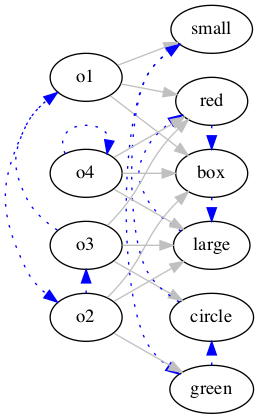

In [11]:
pw_id = 4

draw(PWEVisualization.graphviz_from_meta_data(pw_slicer(ex1['pw_rel_dfs'], None, [pw_id])[0], 
                                              ex1['meta_data']['graphviz']))